In [1]:
#%matplotlib inline
%matplotlib widget

In [2]:
# initialization
from rayoptics.environment import *
from rayoptics.parax import specsheet

In [3]:
isdark = True

In [4]:
def conic_to_asphere(c, cc):
    ec = cc + 1
    B = [0.]*5
    B[1] = (1/8)*(ec - 1)*c**3
    B[2] = (1/16)*(ec**2 - 1)*c**5
    B[3] = (5/128)*(ec**3 - 1)*c**7
    B[4] = (7/256)*(ec**4 - 1)*c**9
    return B

In [5]:
def fit_asphere_to_conic(cv, cc, degree=12, max_y=1.0):
    from scipy import linalg
    y_incr = 0.05
    conic_prof = Conic(c=cv, cc=cc)
    conic_prof.update()
    even_poly_conic = EvenPolynomial(c=cv, cc=0, coefs=[0]*(degree//2))
    even_poly_conic.update()
    
    a = np.array([[y**(i) for i in range(4, degree+2, 2)] for y in np.arange(0., max_y+y_incr, y_incr)])
    b = np.array([conic_prof.sag(0., y)-even_poly_conic.sag(0., y) for y in np.arange(0., max_y+y_incr, y_incr)])

    results = linalg.lstsq(a, b)
#    coefs = results[0]

    return results, a, b

In [6]:
cv = -(1 - 1e-15)
cc = -1
ec = 0

In [7]:
conic_to_asphere(c=cv, cc=cc)

[0.0,
 0.12499999999999963,
 0.06249999999999969,
 0.03906249999999973,
 0.027343749999999754]

In [8]:
results = fit_asphere_to_conic(cv, cc, degree=20, max_y=0.9)

In [9]:
results[0]

(array([ 0.12515898,  0.05701812,  0.11192644, -0.47484661,  2.02460993,
        -4.80113964,  6.91380101, -5.44435364,  1.86420446]),
 2.481176627162566e-14,
 9,
 array([1.51391288e+00, 2.79177031e-01, 5.10052735e-02, 8.34958459e-03,
        1.18516372e-03, 1.42513685e-04, 1.40301257e-05, 1.06356383e-06,
        5.36055525e-08]))

In [10]:
coefs_fit = np.concatenate((np.array([0.]), results[0][0])); coefs_fit

array([ 0.        ,  0.12515898,  0.05701812,  0.11192644, -0.47484661,
        2.02460993, -4.80113964,  6.91380101, -5.44435364,  1.86420446])

In [11]:
sphere_prof = Spherical(c=cv).update()
conic_prof = Conic(c=cv, cc=cc).update()
even_poly_conic_fit = EvenPolynomial(c=cv, cc=0, coefs=coefs_fit).update()
even_poly_conic_calc = EvenPolynomial(c=cv, cc=0, coefs=conic_to_asphere(c=cv, cc=cc)).update()
rad_coefs_fit = []
rad_coefs_calc = []
for i, c in enumerate(coefs_fit):
    rad_coefs_fit.append(0)
    rad_coefs_fit.append(c)
rad_poly_conic = RadialPolynomial(c=cv, ec=1, coefs=rad_coefs_fit).update()

In [12]:
listobj(rad_poly_conic)

profile: RadialPolynomial
c=-0.999999999999999,   r=-1.000000000000001   conic cnst=0.0
coefficients: [0, 0.0, 0, 0.12515897565317008, 0, 0.05701812015383613, 0, 0.11192644308242643, 0, -0.4748466080788697, 0, 2.0246099289062016, 0, -4.801139636197904, 0, 6.9138010096835805, 0, -5.444353644548694, 0, 1.864204456984458]



In [13]:
for y in np.arange(0., 1.1, .1):
    sag_z = even_poly_conic_fit.sag(0, y)
    print('{:4.1f}: {:12.6g}  {:12.6g}'.format(y, sag_z, even_poly_conic_fit.normal(np.array([0, y, sag_z]))[1]))

 0.0:            0             0
 0.1:  -0.00499999     0.0995034
 0.2:        -0.02      0.196116
 0.3:       -0.045      0.287349
 0.4:        -0.08       0.37139
 0.5:       -0.125      0.447215
 0.6:        -0.18      0.514494
 0.7:       -0.245      0.573464
 0.8:        -0.32      0.624704
 0.9:       -0.405      0.669541
 1.0:    -0.623621             1


In [14]:
for y in np.arange(0., 1.1, .1):
    sag_z = conic_prof.sag(0, y)
    print('{:4.1f}: {:12.6g}  {:12.6g}'.format(y, sag_z, conic_prof.normal(np.array([0, y, sag_z]))[1]))

 0.0:           -0             0
 0.1:       -0.005     0.0995037
 0.2:        -0.02      0.196116
 0.3:       -0.045      0.287348
 0.4:        -0.08      0.371391
 0.5:       -0.125      0.447214
 0.6:        -0.18      0.514496
 0.7:       -0.245      0.573462
 0.8:        -0.32      0.624695
 0.9:       -0.405      0.668965
 1.0:         -0.5      0.707107


In [15]:
for y in np.arange(0., 1.1, .1):
    sag_z = sphere_prof.sag(0, y)
    print('{:4.1f}: {:12.6g}  {:12.6g}'.format(y, sag_z, sphere_prof.normal(np.array([0, y, sag_z]))[1]))

 0.0:           -0             0
 0.1:  -0.00501256           0.1
 0.2:   -0.0202041           0.2
 0.3:   -0.0460608           0.3
 0.4:   -0.0834849           0.4
 0.5:    -0.133975           0.5
 0.6:         -0.2           0.6
 0.7:    -0.285857           0.7
 0.8:         -0.4           0.8
 0.9:     -0.56411           0.9
 1.0:           -1             1


In [16]:
np.array([conic_prof.sag(0., y)-even_poly_conic_fit.sag(0., y) for y in np.arange(0., .95, .05)])

array([-0.00000000e+00, -9.10741152e-10, -1.10960625e-08, -3.40641430e-08,
       -4.60914940e-08, -1.85756924e-08,  3.10573792e-08,  4.09961867e-08,
       -1.10020378e-08, -4.95448294e-08,  9.25177851e-11,  5.71616149e-08,
       -1.06356526e-08, -6.50351538e-08,  7.78544063e-08, -4.42042564e-08,
        1.43145271e-08, -2.56242033e-09,  1.98700723e-10])

In [17]:
for y in np.arange(0., 1.0, .1):
    sag_z_conic = conic_prof.sag(0., y)
    sag_z_poly = even_poly_conic_fit.sag(0, y)
    sag_z_delta = conic_prof.sag(0., y)-even_poly_conic_fit.sag(0, y)
    slope_y_delta = conic_prof.normal(np.array([0, y, sag_z_conic]))[1]-even_poly_conic_fit.normal(np.array([0, y, sag_z_poly]))[1]
    print('{:4.1f}: {:12.6g}  {:12.6g}'.format(y, sag_z_delta, slope_y_delta))

 0.0:           -0             0
 0.1: -1.10961e-08   3.55152e-07
 0.2: -4.60915e-08  -1.01041e-07
 0.3:  3.10574e-08  -7.09939e-07
 0.4:  -1.1002e-08   1.02368e-06
 0.5:  9.25178e-11  -1.16477e-06
 0.6: -1.06357e-08   1.42755e-06
 0.7:  7.78544e-08  -1.42814e-06
 0.8:  1.43145e-08   -9.2203e-06
 0.9:  1.98701e-10  -0.000576324


# Create a new model

In [18]:
opm = OpticalModel()
sm = opm.seq_model
osp = opm.optical_spec
pm = opm.parax_model
em = opm.ele_model

## Define first order aperture and field for system

In [19]:
osp.pupil = PupilSpec(osp, key=['object', 'pupil'], value=.5)
osp.field_of_view = FieldSpec(osp, key=['object', 'height'], flds=[0.])
osp.spectral_region = WvlSpec([('d', 1.0)], ref_wl=0)

## Define interface and gap data for the sequential model

In [20]:
sm.gaps[0].thi=1e11


opm.add_dummy_plane(t=1)

opm.add_mirror(profile=even_poly_conic_fit, t=-0.5)

## Update the model

In [21]:
opm.update_model()

In [22]:
sm.list_model()

              c            t        medium     mode   zdr      sd
  Obj:     0.000000  1.00000e+11       air             1      0.0000
    1:     0.000000      1.00000       air             1     0.25000
    2:    -1.000000    -0.500000       air    reflect -1     0.25000
  Img:    -0.000000      0.00000                      -1  1.0722e-06


In [23]:
listobj(sm.ifcs[2].profile)

profile: EvenPolynomial
c=-0.999999999999999,   r=-1.000000000000001   conic cnst=0
coefficients: [ 0.          0.12515898  0.05701812  0.11192644 -0.47484661  2.02460993
 -4.80113964  6.91380101 -5.44435364  1.86420446]



# Draw a lens picture

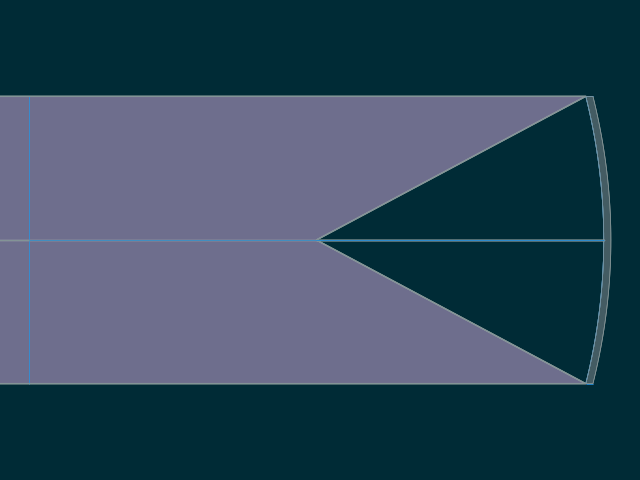

In [24]:
layout_plt1 = plt.figure(FigureClass=InteractiveLayout, opt_model=opm,
                        do_draw_rays=True, do_paraxial_layout=False, is_dark=isdark).plot()

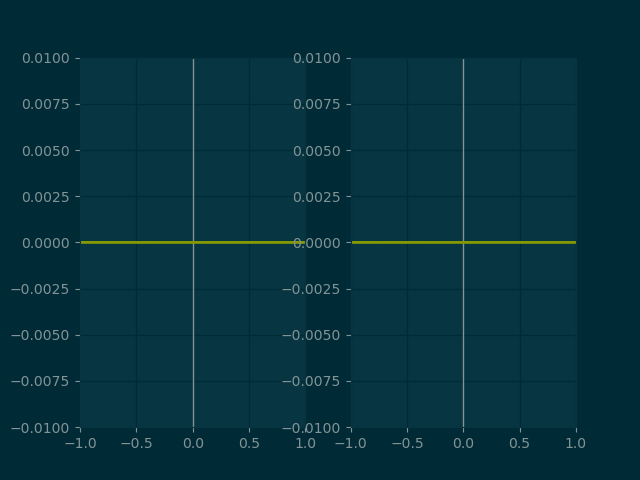

In [25]:
abr_plt1 = plt.figure(FigureClass=RayFanFigure, opt_model=opm, data_type='Ray',
                      scale_type=Fit.User_Scale, user_scale_value=0.01, is_dark=isdark).plot()

In [26]:
s1=sm.ifcs[2]
g=sm.gaps[1]

In [27]:
s1.profile = rad_poly_conic
opm.update_model()

# Draw a lens picture

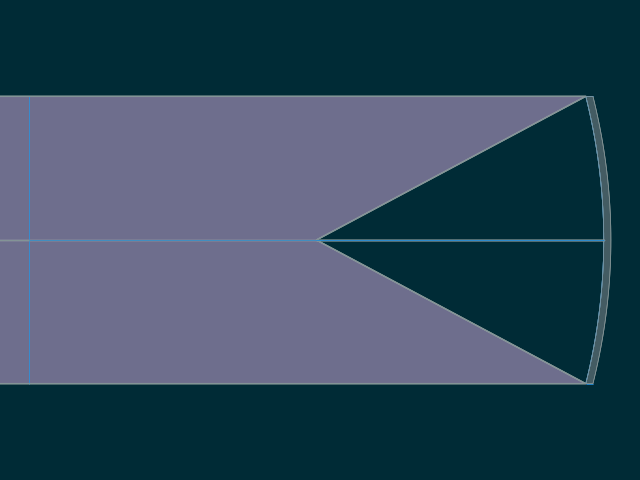

In [28]:
layout_plt2 = plt.figure(FigureClass=InteractiveLayout, opt_model=opm,
                         do_draw_beams=True, 
                         do_draw_edge_rays=True, 
                         do_draw_ray_fans=False, 
                         do_paraxial_layout=False, 
                         is_dark=isdark).plot()

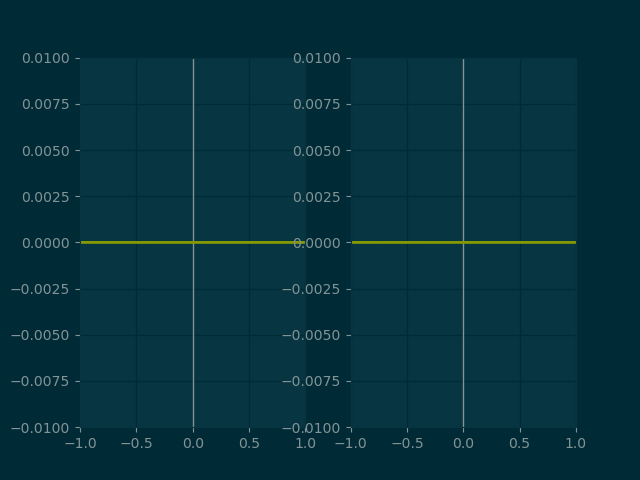

In [29]:
abr_plt2 = plt.figure(FigureClass=RayFanFigure, opt_model=opm, data_type='Ray',
                      scale_type=Fit.User_Scale, user_scale_value=0.01, is_dark=isdark).plot()

In [30]:
for y in np.arange(0., 1.1, .1):
    sag_z = rad_poly_conic.sag(0, y)
    print('{:4.1f}: {:12.6g}  {:12.6g}'.format(y, sag_z, rad_poly_conic.normal(np.array([0, y, sag_z]))[1]))

 0.0:            0             0
 0.1:  -0.00499999     0.0995034
 0.2:        -0.02      0.196116
 0.3:       -0.045      0.287349
 0.4:        -0.08       0.37139
 0.5:       -0.125      0.447215
 0.6:        -0.18      0.514494
 0.7:       -0.245      0.573464
 0.8:        -0.32      0.624704
 0.9:       -0.405      0.669541
 1.0:    -0.623621             1


In [31]:
even_poly = EvenPolynomial(c=cv, ec=ec, coefs=[0., 0.25]).update()
rad_poly = RadialPolynomial(c=cv, ec=ec, coefs=[0., 0., 0., 0.25]).update()

In [32]:
for y in np.arange(0., 1.1, .1):
    sag_z = even_poly.sag(0, y)
    print('{:4.1f}: {:12.6g}  {:12.6g}'.format(y, sag_z, even_poly.normal(np.array([0, y, sag_z]))[1]))

 0.0:            0             0
 0.1:    -0.004975     0.0985184
 0.2:      -0.0196      0.188556
 0.3:    -0.042975      0.263362
 0.4:      -0.0736      0.318502
 0.5:    -0.109375      0.351123
 0.6:      -0.1476      0.358479
 0.7:    -0.184975      0.336217
 0.8:      -0.2176      0.276751
 0.9:    -0.240975      0.168553
 1.0:        -0.25  -9.99201e-16


In [33]:
for y in np.arange(0., 1.1, .1):
    sag_z = rad_poly.sag(0, y)
    print('{:4.1f}: {:12.6g}  {:12.6g}'.format(y, sag_z, rad_poly.normal(np.array([0, y, sag_z]))[1]))

 0.0:            0             0
 0.1:    -0.004975     0.0985184
 0.2:      -0.0196      0.188556
 0.3:    -0.042975      0.263362
 0.4:      -0.0736      0.318502
 0.5:    -0.109375      0.351123
 0.6:      -0.1476      0.358479
 0.7:    -0.184975      0.336217
 0.8:      -0.2176      0.276751
 0.9:    -0.240975      0.168553
 1.0:        -0.25  -9.99201e-16


In [34]:
even_poly_only = EvenPolynomial(coefs=[0., 0.25]).update()
rad_poly_only = RadialPolynomial(coefs=[0., 0., 0., 0.25]).update()

In [35]:
for y in np.arange(0., 1.1, .1):
    sag_z = even_poly_only.sag(0, y)
    print('{:4.1f}: {:12.6g}  {:12.6g}'.format(y, sag_z, even_poly_only.normal(np.array([0, y, sag_z]))[1]))

 0.0:            0            -0
 0.1:      2.5e-05        -0.001
 0.2:       0.0004   -0.00799974
 0.3:     0.002025    -0.0269902
 0.4:       0.0064    -0.0638693
 0.5:     0.015625     -0.124035
 0.6:       0.0324     -0.211131
 0.7:     0.060025     -0.324445
 0.8:       0.1024     -0.455738
 0.9:     0.164025     -0.589084
 1.0:         0.25     -0.707107


In [36]:
for y in np.arange(0., 1.1, .1):
    sag_z = rad_poly_only.sag(0, y)
    print('{:4.1f}: {:12.6g}  {:12.6g}'.format(y, sag_z, rad_poly_only.normal(np.array([0, y, sag_z]))[1]))

 0.0:            0            -0
 0.1:      2.5e-05        -0.001
 0.2:       0.0004   -0.00799974
 0.3:     0.002025    -0.0269902
 0.4:       0.0064    -0.0638693
 0.5:     0.015625     -0.124035
 0.6:       0.0324     -0.211131
 0.7:     0.060025     -0.324445
 0.8:       0.1024     -0.455738
 0.9:     0.164025     -0.589084
 1.0:         0.25     -0.707107


In [37]:
s1.profile = even_poly_only
opm.update_model()

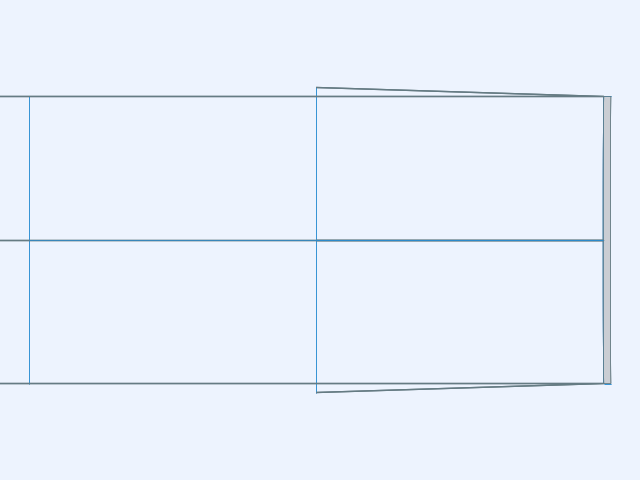

In [38]:
layout_plt = plt.figure(FigureClass=InteractiveLayout, opt_model=opm,
                        do_draw_rays=False, do_paraxial_layout=False).plot()

In [39]:
listobj(even_poly_only)

profile: EvenPolynomial
c=0.0,   r=0.0   conic cnst=0.0
coefficients: [0.0, 0.25]



In [40]:
pm.first_order_data()

efl                   0
ffl                   0
pp1                   0
bfl                   0
ppk                   0
f/#              -2e+11
m                     1
red                   1
obj_dist          1e+11
obj_ang        5.73e-10
enp_dist       1.11e-05
enp_radius         0.25
na obj          2.5e-12
n obj                 1
img_dist          1e+10
img_ht               -1
exp_dist          1e+10
exp_radius         0.25
na img         -2.5e-12
n img                -1
optical invariant      2.5e-12
